In [7]:
import nltk
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

In [8]:
spam = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data', sep = ",", header = None)

In [9]:
spam.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [10]:
names = ["word_freq_make", 
 "word_freq_address", 
 "word_freq_all", 
 "word_freq_3d", 
 "word_freq_our", 
 "word_freq_over", 
 "word_freq_remove", 
 "word_freq_internet",
 "word_freq_order",        
 "word_freq_mail",         
 "word_freq_receive",      
 "word_freq_will",     
 "word_freq_people",
 "word_freq_report",       
 "word_freq_addresses",    
 "word_freq_free",       
 "word_freq_business",     
 "word_freq_email",        
 "word_freq_you",         
 "word_freq_credit",       
 "word_freq_your",         
 "word_freq_font",         
 "word_freq_000",          
 "word_freq_money",        
 "word_freq_hp",           
 "word_freq_hpl",          
 "word_freq_george",       
 "word_freq_650",          
 "word_freq_lab",          
 "word_freq_labs",         
 "word_freq_telnet",       
 "word_freq_857",          
 "word_freq_data",     
 "word_freq_415",          
 "word_freq_85",           
 "word_freq_technology",   
 "word_freq_1999",         
 "word_freq_parts",        
 "word_freq_pm",           
 "word_freq_direct",       
 "word_freq_cs",           
 "word_freq_meeting",      
 "word_freq_original",     
 "word_freq_project",      
 "word_freq_re",           
 "word_freq_edu",          
 "word_freq_table",        
 "word_freq_conference",   
 "char_freq_;",            
 "char_freq_(",            
 "char_freq_[",            
 "char_freq_!",            
 "char_freq_$",            
 "char_freq_#",            
 "capital_run_length_average",
 "capital_run_length_longest",
 "capital_run_length_total",
 "spam"]
spam.columns = names 

In [11]:
spam.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [12]:
target = spam['spam']
features = spam.drop('spam', axis = 1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, stratify = target)

In [14]:
X_train.shape
X_test.shape

(1381, 57)

In [15]:
# Evaluate Algorithms 
# Test options and evaluate metric
num_folds=10
seed=7
scoring='accuracy'

In [16]:
#define models
models=[]
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='scale')))

In [17]:
# Evaluate each model one at a time
results=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=num_folds,random_state=seed)
    cv_results=cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s:%f(%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)

LDA:0.881366(0.016125)
KNN:0.786335(0.014218)
NB:0.818323(0.017800)
SVM:0.698447(0.022285)


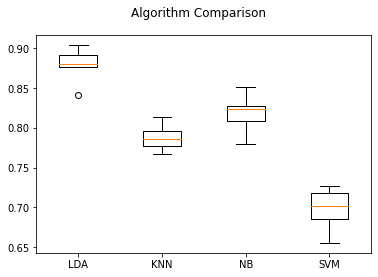

In [18]:
# Compare Algorithms distribution accuracy
fig=pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()